# Generalized chi-square distribution · Getting started

The generalized chi-square variable is a quadratic form of a normal variable, or equivalently, a linear sum of independent non-central chi-square variables and a normal variable.

Look into each function code or type `help(functionname)` for more features and documentation.
## Core Functions
- `gx2_params_norm_quad`: Transforms normal parameters and a quadratic form into a generalized chi-squared distribution's parameters.
- `gx2cdf_davies`: Computes the CDF using Davies' method.
- `gx2cdf_imhof`: Computes the CDF using Imhof's method.
- `gx2cdf_ruben`: Computes the CDF using Ruben's method.
- `gx2cdf`: Generalized function to compute the CDF using the most appropriate method.
- `gx2inv`: Finds the inverse CDF.
- `gx2pdf`: Computes the PDF either by differentiation or convolution.
- `gx2rnd`: Generates random numbers from the generalized chi-squared distribution.
- `gx2stat`: Returns the mean and variance.


## Calculate mean and variance


In [1]:
from functions import gx2stat
import numpy as np

# Define the parameters
w = np.array([1, -10, 2])
k = np.array([1, 2, 3])
lambda_ = np.array([2, 3, 7])
m = 10
s = 5

# Calculate mean and variance
mu, v = gx2stat(w, k, lambda_, m, s)
mu, v

(-17, 1771)

# Generate Random Samples

In [2]:
from functions import gx2rnd

size = (1, int(1e5))

# Generate random samples
r = gx2rnd(w, k, lambda_, m, s, size)
r.shape, r.mean(), r.std()

((1, 100000), -17.185038511325544, 42.26684314675276)

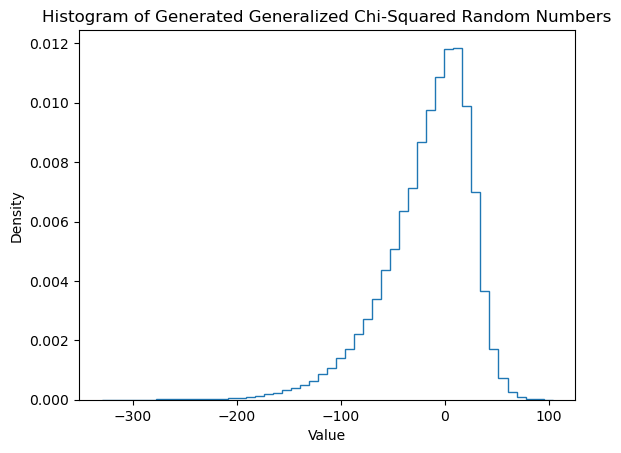

In [3]:
import matplotlib.pyplot as plt

# Plotting the histogram of generated random numbers
plt.hist(r[0], bins=50, density=True, histtype='step', label='Sampled Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Generated Generalized Chi-Squared Random Numbers')
plt.show()


# Calculate PDF and CDF

In [4]:
# in matlab:
# x=[10 25];
# f=gx2pdf(x,w,k,lambda,m,s)

# in python:
from functions import gx2pdf

x = np.array([10, 25])
f = gx2pdf(x, w, k, lambda_, m, s)
f

/Users/salim/gx2/functions.py:258: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x == 'full':
/Users/salim/gx2/functions.py:339: RuntimeWarning: overflow encountered in exp
  rho = np.prod(((1 + w ** 2 * u ** 2) ** (k / 4)) * np.exp(((w ** 2 * u ** 2) * lambda_) / (2 * (1 + w ** 2 * u ** 2)))) * np.exp(u ** 2 * s ** 2 / 8)
/Users/salim/gx2/functions.py:300: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x == 'full':


array([0.01054852, 0.0048638 ])

In [5]:
# in matlab:
# p=gx2cdf(x,w,k,lambda,m,s,'AbsTol',0,'RelTol',1e-4)

# in python:
from functions import gx2cdf

# def gx2cdf(x: Union[float, np.ndarray], w: np.ndarray, k: np.ndarray, lambda_: np.ndarray, m: float, s: float, side: str = 'lower', AbsTol: float = 1e-10, RelTol: float = 1e-6) -> np.ndarray:
p = gx2cdf(x, w, k, lambda_, m, s, side='lower', AbsTol=1e-10, RelTol=1e-6)
p

array([0.83043495, 0.94697196])

## Compare calculated and samples PDFs

In [6]:
f, x = gx2pdf('full', w, k, lambda_, m, s)
plt.plot(x, f)
plt.hist(r, density=True, histtype='step')
plt.axvline(mu, linestyle='-', label='\mu \pm \sigma')
plt.axvline(mu - np.sqrt(v), linestyle='-')
plt.axvline(mu + np.sqrt(v), linestyle='-')
plt.xlim([mu - 2 * np.sqrt(v), mu + 2 * np.sqrt(v)])
plt.ylim([0, 0.015])
plt.ylabel('pdf')
plt.show()


/Users/salim/gx2/functions.py:270: RuntimeWarning: invalid value encountered in remainder
  span = span - np.mod(span, dx)  # to center around 0


ValueError: arange: cannot compute length

## Compare calculated and samples CDFs

In [12]:
x_vals = np.linspace(mu-2*np.sqrt(v), mu+2*np.sqrt(v), 100)
cdf_vals = gx2cdf(x_vals, w, k, lambda_, m, s)

plt.figure()
plt.plot(x_vals, cdf_vals, label='gx2cdf')
plt.hist(r, cumulative=True, density=True, histtype='step', label='Sample CDF')
plt.axvline(mu, linestyle='-', label='\mu \pm \sigma')
plt.axvline(mu - np.sqrt(v), linestyle='-')
plt.axvline(mu + np.sqrt(v), linestyle='-')
plt.xlim([mu - 2 * np.sqrt(v), mu + 2 * np.sqrt(v)])
plt.ylim([0, 1])
plt.xlabel('x')
plt.ylabel('cdf')
plt.legend()
plt.show()


TypeError: only size-1 arrays can be converted to Python scalars

# Compute Inverse CDF

# Distribution of quadratic form of a normal variable

Sample normal random vectors:

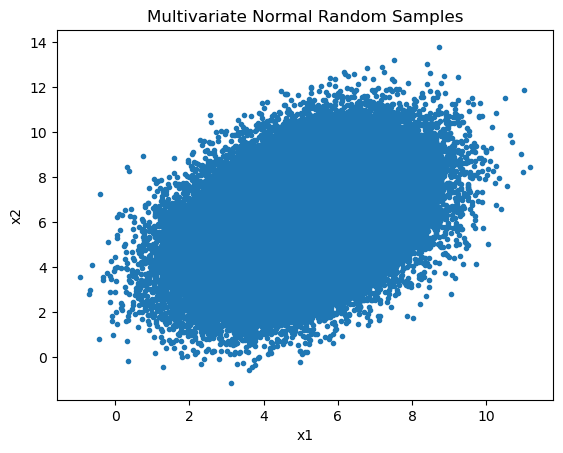

In [6]:
# in matlab
# x=mvnrnd(mu,v,1e5)';
# figure; plot(x(1,:),x(2,:),'.')

from scipy.stats import multivariate_normal

# Define mean and covariance matrix
mu = np.array([5, 6])
v = np.array([[2, 1], [1, 3]])

# Generate random samples from the multivariate normal distribution
x = multivariate_normal.rvs(mean=mu, cov=v, size=int(1e5)).T

# Plot the generated data
plt.figure()
plt.scatter(x[0], x[1], marker='.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Multivariate Normal Random Samples')
plt.show()



Quadratic form:
$$
\text{Quadratic form} = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}^T \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} + \begin{pmatrix} -1 \\ 0 \end{pmatrix}^T \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} - 1
$$

In [7]:
from functions import gx2_params_norm_quad

# Define parameters for the quadratic form
quad_q2 = np.array([[1, 1], [1, 1]])
quad_q1 = np.array([-1, 0])
quad_q0 = -1

# Compute the quadratic form q for the sample of normal vectors
q = np.sum(x * np.dot(quad_q2, x), axis=0) + np.dot(quad_q1.T, x) + quad_q0

# Get generalized chi-square parameters corresponding to the quadratic form
quad = {
    'q2': np.array([[1, 1], [1, 1]]),
    'q1': np.array([-1, 0]),
    'q0': -1
}

w, k, lambda_, m, s = gx2_params_norm_quad(mu, v, quad)
print("w:", w)
print("k:", k)
print("lambda:", lambda_)
print("m:", m)
print("s:", s)

w: [7.]
k: [1]
lambda: [16.61880466]
m: -1.3316326530612344
s: 0.8451542547285129


/Users/salim/gx2-python/functions.py:261: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s == 0 and len(set(w)) == 1 and x != 'full':
/Users/salim/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


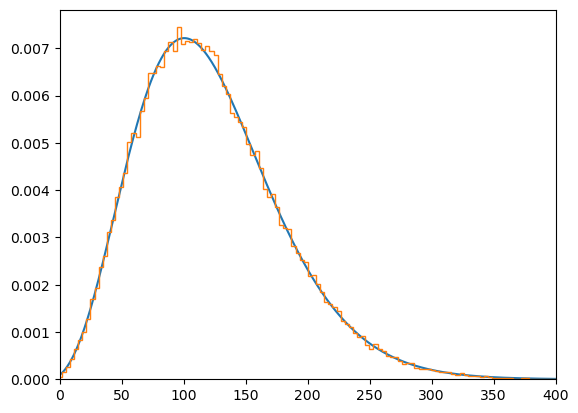

In [8]:
# Compare the sampled and calculated distributions of q

import numpy as np
import matplotlib.pyplot as plt
from functions import gx2pdf

# Call gx2pdf function and unpack the result into f and x
f, x = gx2pdf('full', w, k, lambda_, m, s)

# Plot the PDF
plt.plot(x, f)

# Create a histogram of q with PDF normalization and 'stairs' display style
plt.hist(q, density=True, histtype='step', bins='auto')

# Set the x-axis limits
plt.xlim(0, 400)

# Show the plot
plt.show()


In [9]:
# Compare the sampled and calculated means and variances
mu_q, v_q = gx2stat(w, k, lambda_, m, s)
print("mu_q:", mu_q)
print("mean(q):", np.mean(q))

mu_q: 122.0
mean(q): 121.96200618464478


In [10]:

print("v_q:", v_q)
print("var(q):", np.var(q))

from functions import gx2cdf
print("mean(q<50):", np.mean(q < 50))


print("gx2cdf(50,w,k,lambda,m,s):", gx2cdf(50, w, k, lambda_, m, s))

v_q: 3356.0000000000005
var(q): 3352.134851505984
mean(q<50): 0.0863
gx2cdf(50,w,k,lambda,m,s): [0.08019794]
